# Parte 1: Clusterização
Considere o conjunto de dados sobre clientes de um shopping disponibilizado em: 

https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv 

Esse conjunto de dados é composto pelas variáveis CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Suponha que o seu trabalho como analista de dados seja encontrar perfis de consumidores. 

Considerando as variáveis numéricas, faça a clusterização dos dados, encontrando a quantidade ótima de clusters. 

Mostre os valores dos atributos dos centróides de cada cluster. 

Que observações podem ser feitas sobre cada cluster? Ou seja, que tipo de cliente cada cluster representa. Discuta.

Extra: crie scatterplots com os dados clusterizados. Considere fazer gráficos dois-a-dois (use a cor para representar gênero): 

Annual Income (k$) x Spending Score (1-100)

Annual Income (k$) x Age

Age x Spending Score (1-100)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
df_shop = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
# 1. ID do cliente: É a ID exclusiva fornecida a um cliente
# 2. Sexo: Sexo do cliente
# 3. Idade: A idade do cliente
# 4. Renda anual (k $): É a receita anual do cliente
# 5. Pontuação de gastos: É a pontuação (em 100) dada a um cliente pelas autoridades do shopping, com base no dinheiro gasto e no comportamento do cliente.

In [143]:
df_shop.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [144]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


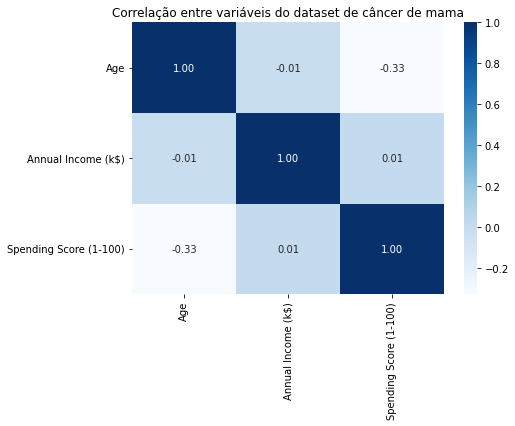

In [145]:
df_shop_focus = df_shop[['Age','Annual Income (k$)','Spending Score (1-100)']]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df_shop_focus.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de câncer de mama')
plt.show()

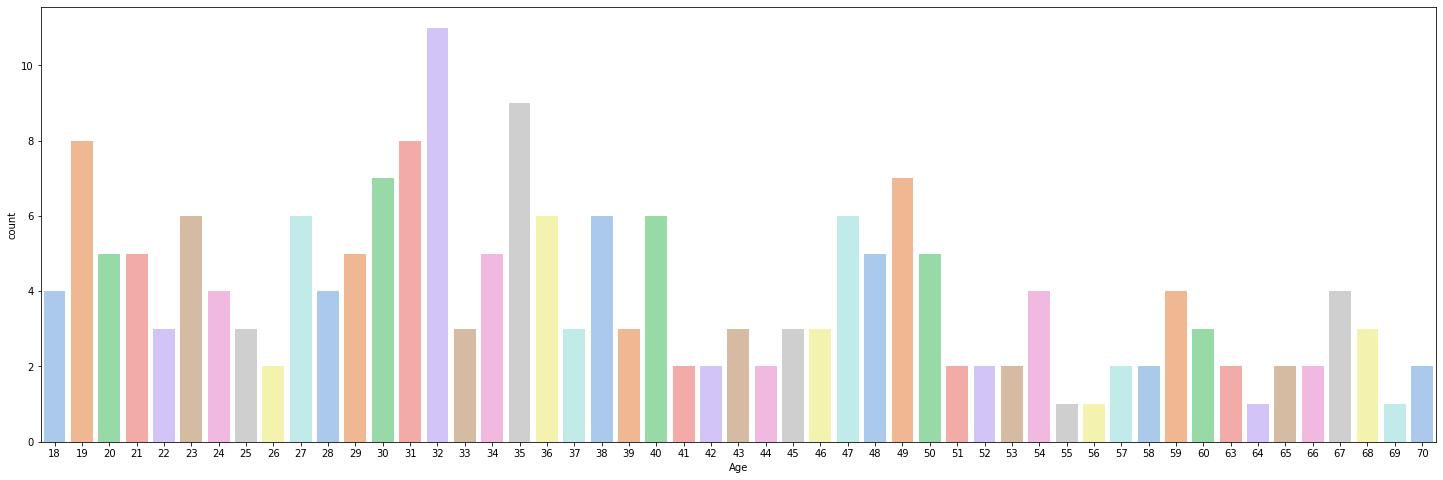

In [146]:
#Visualizando a distribuição de idades dos clientes
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df_shop_focus,palette="pastel")
plt.show()

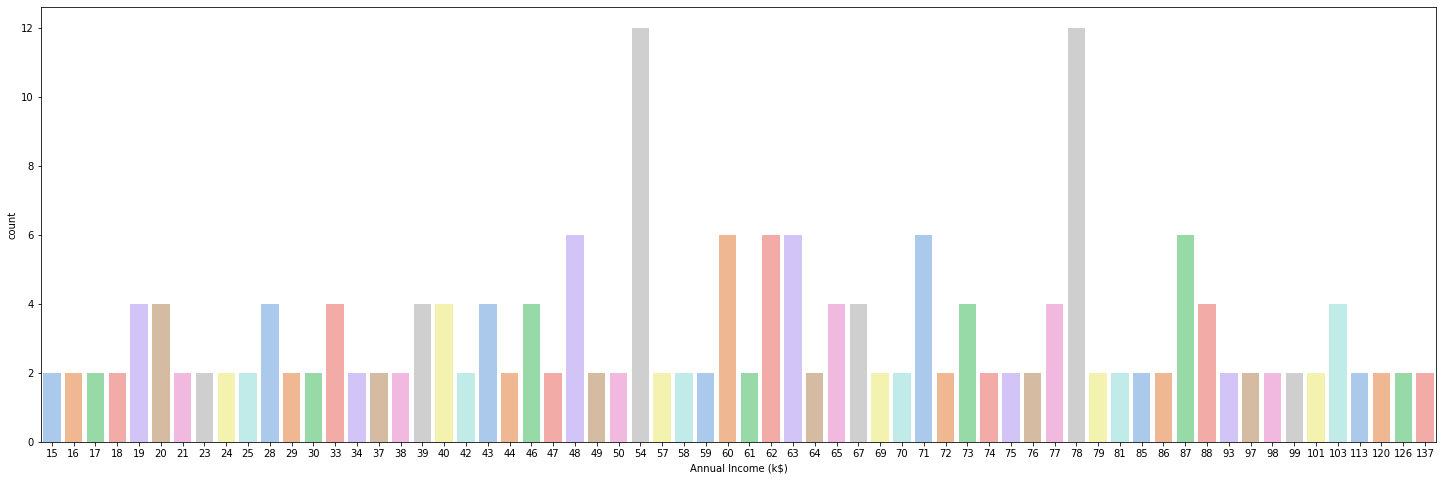

In [147]:
#Visualizando a renda anual dos clientes 
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=df_shop_focus,palette="pastel")
plt.show()

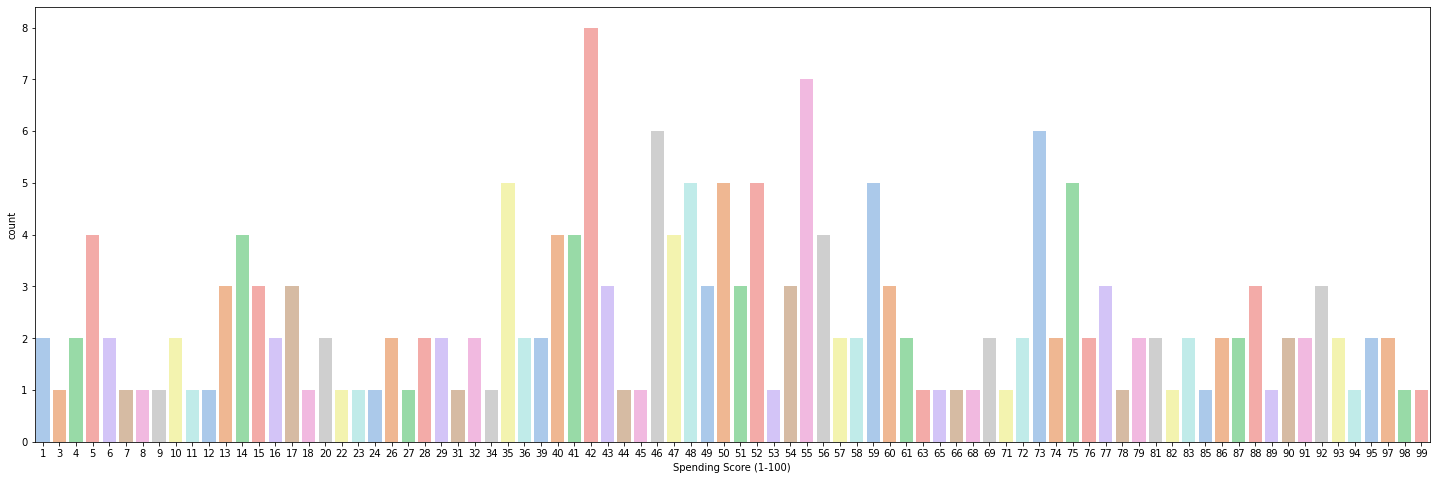

In [148]:
# Visualizando a pontuação dos clientes
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df_shop_focus,palette="pastel")
plt.show()

In [149]:
df_shop.loc[df_shop['Spending Score (1-100)']==99]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


### Clustering com base em 2 recursos
Primeiro, irei trabalhar com apenas dois recursos, que serão: receita anual e pontuação de gastos.

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = df_shop_focus [['Annual Income (k$)','Spending Score (1-100)']]
#normalizando
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [151]:
# Agora calculamos a Soma dos Erros Quadráticos Dentro do Cluster (wcss/sigla do inglês) para diferentes valores de k. 
# Em seguida, escolhemos o k para o qual o wcss primeiro começa a diminuir.
# Este valor de K nos dá o melhor número de clusters para fazer a partir dos dados brutos.
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

n_clusters = O número de clusters a serem formados, bem como o número de centróides a serem gerados.

inicialização (k-means++) = seleciona centros de cluster iniciais para agrupamento de média k de uma maneira inteligente para acelerar a convergência.

max_iter(300) = Número máximo de iterações do algoritmo k-means para uma única execução.

n_init(10) = Número de vezes que o algoritmo k-means será executado com diferentes sementes de centróide. Os resultados finais serão o melhor resultado de n_init execuções consecutivas em termos de inércia.

kmeans.inertia_ = Soma das distâncias quadradas das amostras ao centro do cluster mais próximo, ponderada pelos pesos da amostra, se fornecidos.

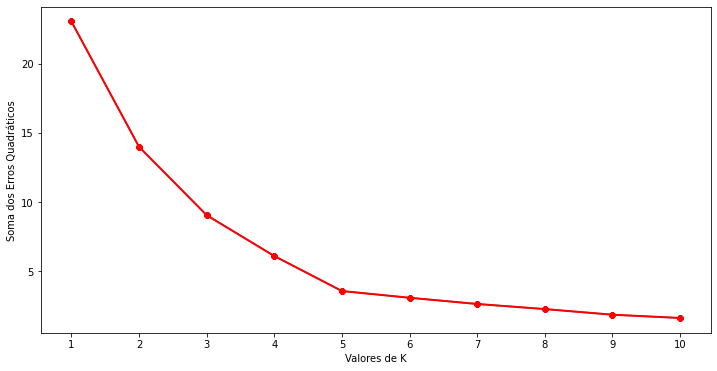

In [152]:
#A curva do cotovelo
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("Valores de K")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Soma dos Erros Quadráticos")
plt.show()

##### Isso é conhecido como gráfico do cotovelo, o eixo x sendo o número de clusters. O número de clusters é obtido no ponto da articulação do cotovelo. Este é o ponto em que criar clusters é mais relevante, pois aqui o valor de WCSS para de diminuir repentinamente. Aqui no gráfico, após 5, a queda é mínima, então consideramos 5 como o número de clusters para este método.

In [159]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
#preditar os rótulos dos dados de entrada
y_kmeans = kmeans.predict(X)
#kmeans.cluster_centers_

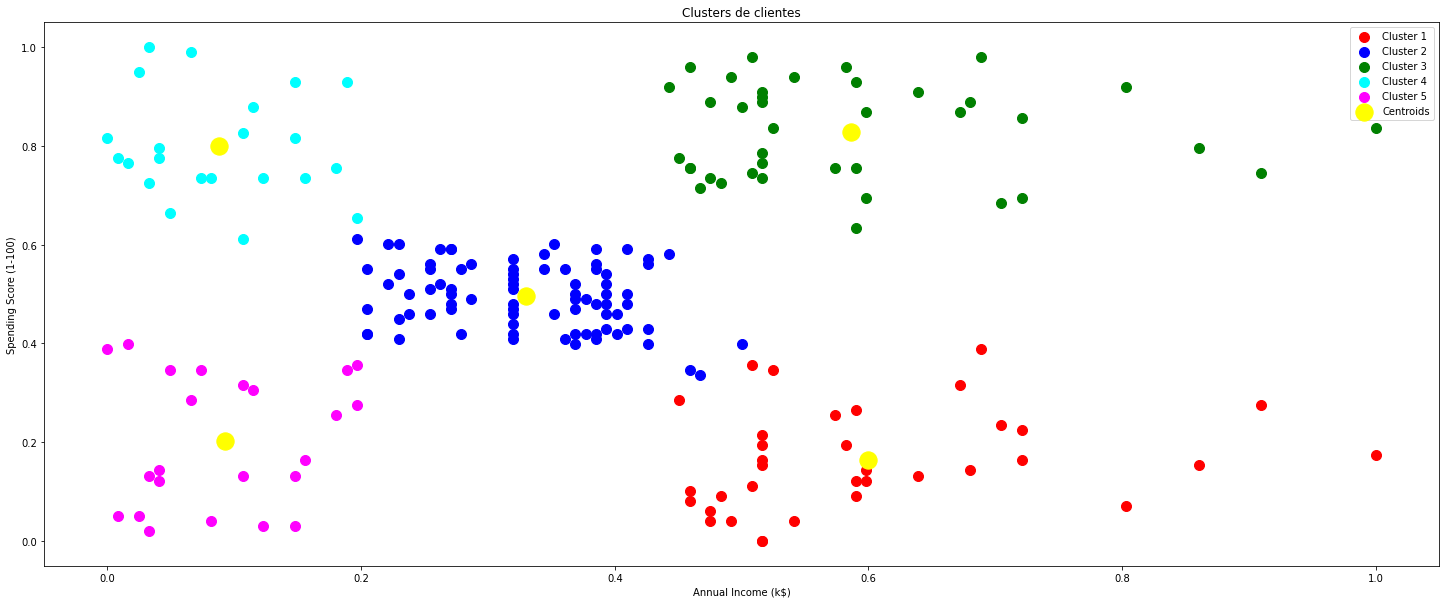

In [158]:
# Plotando os clusters e os centróides
fig = plt.figure(figsize=(25, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


### Analisando os resultados:
Podemos ver que os clientes do shopping podem ser agrupados de forma ampla em 5 grupos com base em suas compras feitas no shopping:

No cluster 1 (vermelho), são as pessoas com renda alta, mas com scores de gastos baixos. Talvez sejam esses clientes que estão insatisfeitos ou insatisfeitas com os serviços do shopping. Esses podem ser os alvos principais do shopping, pois têm potencial para gastar dinheiro. 

No cluster 2 (azul), são as pessoas com renda média e scores de gastos médio.

No cluster 3 (verde), são as pessoas com alta renda e altos scores de gastos, este é o caso ideal para shopping ou lojas, pois essas pessoas são as principais fontes de lucro.

No cluster 4 (ciano), são as pessoas com baixas rendas, mas com scores altos de gastos, são aquelas pessoas que por algum motivo compram produtos com mais frequência, embora tenham uma renda baixa.

No cluster 5 (magenta), são as pessoas com baixa renda anual e baixos scores de gastos, o que faz sentido, por ter menor salário, compra menos.

### Clustering com base em 3 recursos
Agora irei trabalhar com 3 recursos, que são: a idade dos clientes, receita anual e a pontuação de gastos.